# This script is to check that the manage_RM module is able to deal with multiple dimension inputs.

## It is a set of very fast executing tests. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ai4neb import manage_RM

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [2]:
n_samples=300

noise = 0.0 * np.random.randn(n_samples, 2)
noise1 = noise[:,0]
noise2 = noise[:,1]

X22 = np.random.rand(n_samples, 2) * 2 * np.pi
X1 = X22[:,0]
X2 = X22[:,1]

y1 = np.array(np.sin(X1) + noise1).T
y2 = np.array((np.sin(X1) + noise1, np.sin(X1**2) + noise2)).T

y22 = np.array((np.sin(X1) + np.cos(X2) + noise1,
                np.sin(X1)**2 + np.cos(X2)**2 + noise2)).T


In [3]:
print('X1 shape:', X1.shape)
print('X2 shape:', X2.shape)
print('y1 shape:', y1.shape)
print('y2 shape:', y2.shape)

X1 shape: (300,)
X2 shape: (300,)
y1 shape: (300,)
y2 shape: (300, 2)


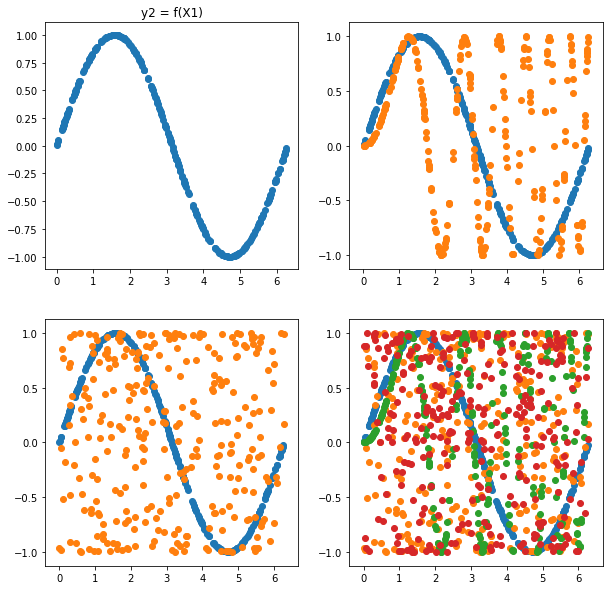

In [5]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))

ax1.scatter(X1, y1)
ax1.set_title('y1 = f(X1)')

ax2.scatter(X1, y2[:,0])
ax2.scatter(X1, y2[:,1])
ax1.set_title('y2 = f(X1)')

ax3.scatter(X22[:,0], y1)
ax3.scatter(X22[:,1], y1)

ax4.scatter(X22[:,0], y2[:,0])
ax4.scatter(X22[:,1], y2[:,0]);
ax4.scatter(X22[:,0], y2[:,1])
ax4.scatter(X22[:,1], y2[:,1]);


In [6]:
N_y_bins = 41 #None
y_vects = None #np.linspace(-2,2,41)

scoring = True
reduce_by = 'max'
split_ratio = 0.6
scaling = True

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 1 inputs for 1 outputs with 120 data
RM trained, with 2274 iterations. Score = 0.957
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.8 s.
Score = 0.949
Predicting from 1 inputs to 1 outputs using 180 data in 0.00 sec

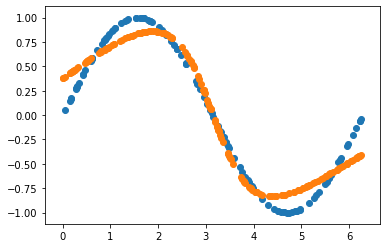

In [7]:
RM1 = manage_RM(X_train=X1, y_train=y1, split_ratio=split_ratio, verbose=True, 
                scaling=scaling)
RM1.init_RM(max_iter=10000, tol=0.00001, solver='adam', activation='tanh',
            hidden_layer_sizes=(10,))
RM1.train_RM()
RM1.predict(scoring=scoring)

print(RM1.N_train, RM1.N_in, RM1.N_train_y, RM1.N_out)
print(RM1.X_train.shape, RM1.y_train_ori.shape, RM1.y_train.shape, RM1.X_test.shape, RM1.pred.shape)

f, ax = plt.subplots()
ax.scatter(RM1.X_train_unscaled, RM1.y_train_ori)
ax.scatter(RM1.X_test_unscaled, RM1.pred);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Discretizing column 0 on 41 bins
Discretizing column 0 on 41 bins
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 1 inputs for 41 outputs with 120 data
RM trained, with 192 iterations. Score = 0.017
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.1 s.
Score = -0.0

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


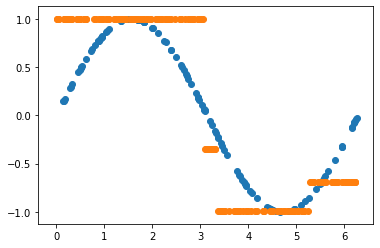

In [8]:
RM1 = manage_RM(X_train=X1, y_train=y1, split_ratio=split_ratio, verbose=True, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM1.init_RM(max_iter=10000, tol=0.00001, solver='adam', activation='tanh',
            hidden_layer_sizes=(10,))
RM1.train_RM()
RM1.predict(scoring=scoring, reduce_by=reduce_by)

print(RM1.N_train, RM1.N_in, RM1.N_train_y, RM1.N_out)
print(RM1.X_train.shape, RM1.y_train_ori.shape, RM1.y_train.shape, RM1.X_test.shape, RM1.pred.shape)

f, ax = plt.subplots()
ax.scatter(RM1.X_train_unscaled, RM1.y_train_ori)
ax.scatter(RM1.X_test_unscaled, RM1.pred);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Discretizing column 0 on 41 bins
Discretizing column 0 on 41 bins
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 2 inputs for 41 outputs with 120 data
RM trained, with 3434 iterations. Score = 0.281
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-06,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 1.5 s.
Score = 

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


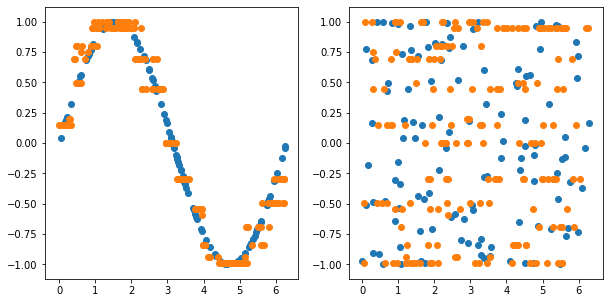

In [10]:
RM2 = manage_RM(X_train=X22, y_train=y1, split_ratio=split_ratio, verbose=True, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM2.init_RM(max_iter=5000, tol=0.000001, solver='lbfgs', activation='tanh', 
            hidden_layer_sizes=(10,10))
RM2.train_RM()
RM2.predict(scoring=scoring, reduce_by=reduce_by)
print(RM2.N_train, RM2.N_in, RM2.N_train_y, RM2.N_out)
print(RM2.X_train.shape, RM2.y_train.shape, RM2.X_test.shape, RM2.pred.shape)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(RM2.X_train_unscaled[:,0], RM2.y_train_ori)
ax1.scatter(RM2.X_test_unscaled[:,0], RM2.pred)
ax2.scatter(RM2.X_train_unscaled[:,1], RM2.y_train_ori)
ax2.scatter(RM2.X_test_unscaled[:,1], RM2.pred);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 1 inputs for 82 outputs with 120 data
RM trained, with 1445 iterations. Score = 0.203
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=1e-07,
             validation_fraction=0

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


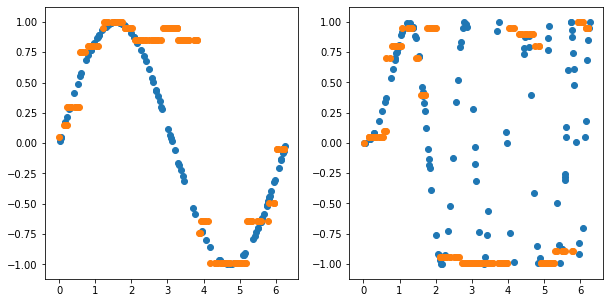

In [11]:
RM3 = manage_RM(X_train=X1, y_train=y2, split_ratio=split_ratio, verbose=True, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM3.init_RM(max_iter=2000, tol=0.0000001, solver='lbfgs', activation='tanh', 
            hidden_layer_sizes=(10,10))
RM3.train_RM()
RM3.predict(scoring=scoring, reduce_by=reduce_by)

print(RM3.N_train, RM3.N_in, RM3.N_train_y, RM3.N_out)
print(RM3.X_train.shape, RM3.y_train_ori.shape, RM3.y_train.shape, RM3.X_test.shape, RM3.pred.shape, RM3.pred_ori.shape, len(RM3.N_y_bins))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(RM3.X_train_unscaled, RM3.y_train_ori[:,0])
ax1.scatter(RM3.X_test_unscaled, RM3.pred[:,0])
ax2.scatter(RM3.X_train_unscaled, RM3.y_train_ori[:,1])
ax2.scatter(RM3.X_test_unscaled, RM3.pred[:,1]);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 2 inputs for 2 outputs with 120 data


/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


RM trained, with 2000 iterations. Score = 0.790
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 1.0 s.
Score = 0.719
Predicting from 2 inputs to 2 outputs using 180 data in 0.00 secs.
120 2 120 2
(120, 2) (120, 2) (120, 2) (120, 2) (180, 2) (180, 2)


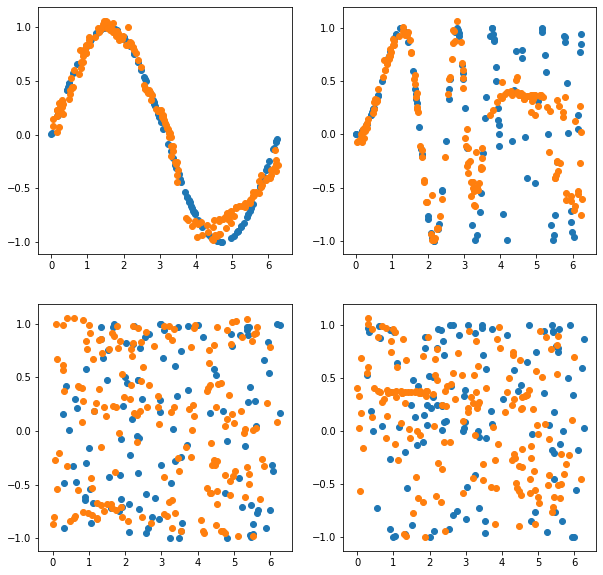

In [13]:
# Without discretization
RM4 = manage_RM(X_train=X22, y_train=y2, split_ratio=split_ratio, 
                verbose=True, scaling=scaling)
RM4.init_RM(max_iter=2000, tol=0.00001, solver='adam', activation='tanh', 
            hidden_layer_sizes=(10,10))
RM4.train_RM()
RM4.predict(scoring=scoring)
print(RM4.N_train, RM4.N_in, RM4.N_train_y, RM4.N_out)
print(RM4.X_train.shape,RM4.X_train_unscaled.shape, RM4.y_train_ori.shape, RM4.y_train.shape, RM4.X_test.shape, RM4.pred.shape)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,0])
ax1.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,0])
ax2.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,1])
ax2.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,1])
ax3.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,0])
ax3.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,0])
ax4.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,1])
ax4.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,1]);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Regression Model SK_ANN
Training 2 inputs for 82 outputs with 120 data


/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


RM trained, with 2000 iterations. Score = 0.090
MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-07,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 1.2 s.
Score = -0.026
Reducing y by max
Predicting from 2 inputs to 82 outputs using 180 data in 0.00 secs.
120 2 120 82
(120, 2) (120, 2) (120, 2) (120, 82) (180, 2) (180, 2)


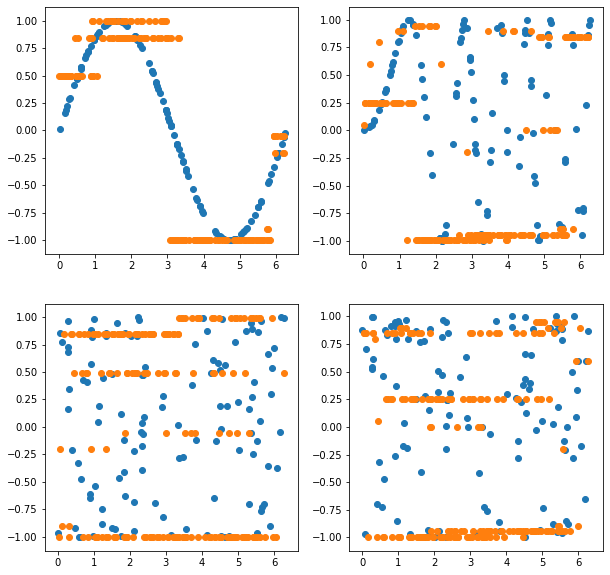

In [14]:
RM4 = manage_RM(X_train=X22, y_train=y2, split_ratio=split_ratio, verbose=True, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM4.init_RM(max_iter=2000, tol=0.0000001, solver='adam', activation='tanh', 
            hidden_layer_sizes=(10,10))
RM4.train_RM()
RM4.predict(scoring=scoring, reduce_by=reduce_by)
print(RM4.N_train, RM4.N_in, RM4.N_train_y, RM4.N_out)
print(RM4.X_train.shape,RM4.X_train_unscaled.shape, RM4.y_train_ori.shape, RM4.y_train.shape, RM4.X_test.shape, RM4.pred.shape)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,0])
ax1.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,0])
ax2.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,1])
ax2.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,1])
ax3.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,0])
ax3.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,0])
ax4.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,1])
ax4.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,1]);

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 120, Test set size = 180
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Discretizing column 0 on 41 bins
Discretizing column 1 on 41 bins
Train data scaled. 
Test data scaled. 
Training set size = 120, Test set size = 180
Training set size = 120, Test set size = 180
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 82)                902       
Total params: 1,042

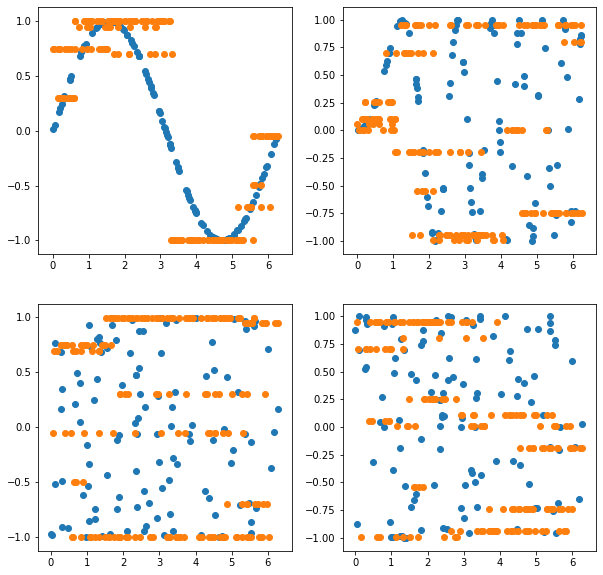

In [15]:
# Using Keras
RM4 = manage_RM(RM_type='K_ANN',X_train=X22, y_train=y2, split_ratio=split_ratio, verbose=True, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM4.init_RM(epochs=1000, solver='adam', activation='tanh', 
            hidden_layer_sizes=(10,10))
RM4.train_RM()
RM4.predict(scoring=scoring, reduce_by=reduce_by)
print(RM4.N_train, RM4.N_in, RM4.N_train_y, RM4.N_out)
print(RM4.X_train.shape,RM4.X_train_unscaled.shape, RM4.y_train_ori.shape, RM4.y_train.shape, RM4.X_test.shape, RM4.pred.shape)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,0])
ax1.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,0])
ax2.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,1])
ax2.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,1])
ax3.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,0])
ax3.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,0])
ax4.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,1])
ax4.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,1]);

Reducing y by max
120 2 120 82
(120, 2) (120, 2) (120, 2) (120, 82) (180, 2) (180, 2)


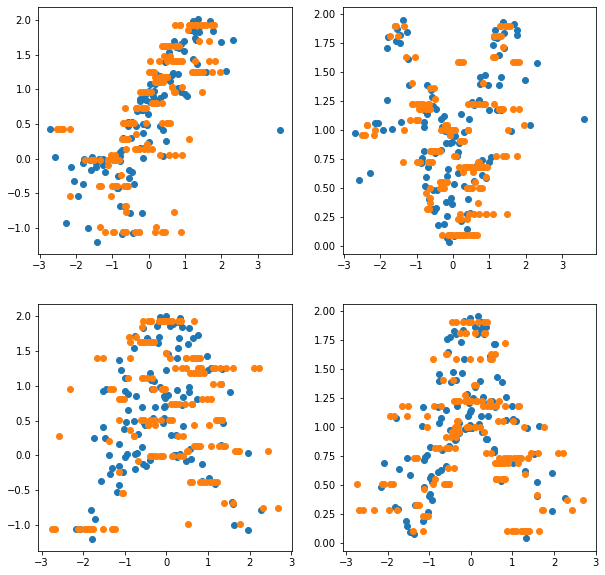

In [16]:
# Using SVM
RM4 = manage_RM(RM_type='SK_SVM',X_train=X2, y_train=y2, split_ratio=split_ratio, verbose=False, 
                N_y_bins=N_y_bins, y_vects=y_vects, scaling=scaling)
RM4.init_RM(kernel='rbf', degree=3, gamma='auto_deprecated', 
            coef0=0.0, tol=0.00001, C=1.0, epsilon=0.01, 
            shrinking=True, cache_size=200, verbose=False, max_iter=-1)
RM4.train_RM()
RM4.predict(scoring=scoring, reduce_by=reduce_by)
print(RM4.N_train, RM4.N_in, RM4.N_train_y, RM4.N_out)
print(RM4.X_train.shape,RM4.X_train_unscaled.shape, RM4.y_train_ori.shape, RM4.y_train.shape, RM4.X_test.shape, RM4.pred.shape)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,0])
ax1.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,0])
ax2.scatter(RM4.X_train_unscaled[:,0], RM4.y_train_ori[:,1])
ax2.scatter(RM4.X_test_unscaled[:,0], RM4.pred[:,1])
ax3.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,0])
ax3.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,0])
ax4.scatter(RM4.X_train_unscaled[:,1], RM4.y_train_ori[:,1])
ax4.scatter(RM4.X_test_unscaled[:,1], RM4.pred[:,1]);